In [1]:
#import beauty
import seaborn as sns
import csv
import pandas
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline
#beauty.set_tex(False)
import time
from datetime import datetime
import numpy as np 
import numpy

In [2]:
results = pandas.DataFrame.from_csv('DATA/all_results/flattened.csv')
results = results.dropna()

In [3]:
sns.set_context("talk", font_scale=1.5)
len(results.index)

1278

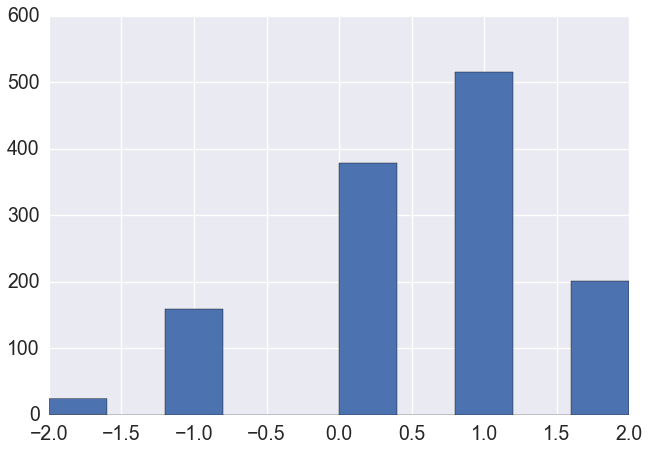

In [4]:
#with plt.style.context(('seaborn-talk')):
results.trust.hist()

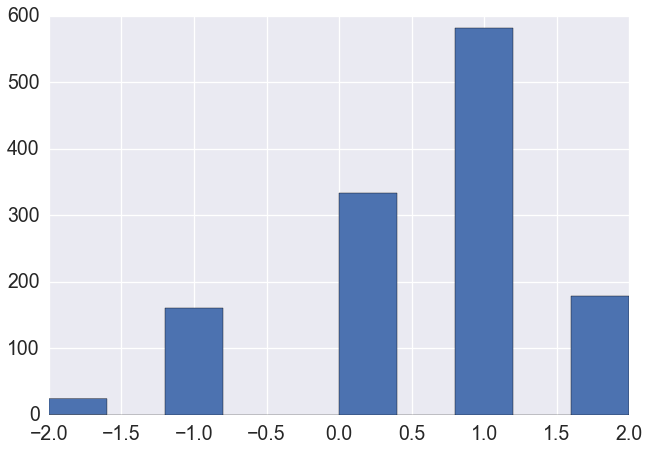

In [5]:
results.fair.hist()

## Demographics

In [6]:
results.gender.value_counts()

male      758
female    496
other      24
Name: gender, dtype: int64

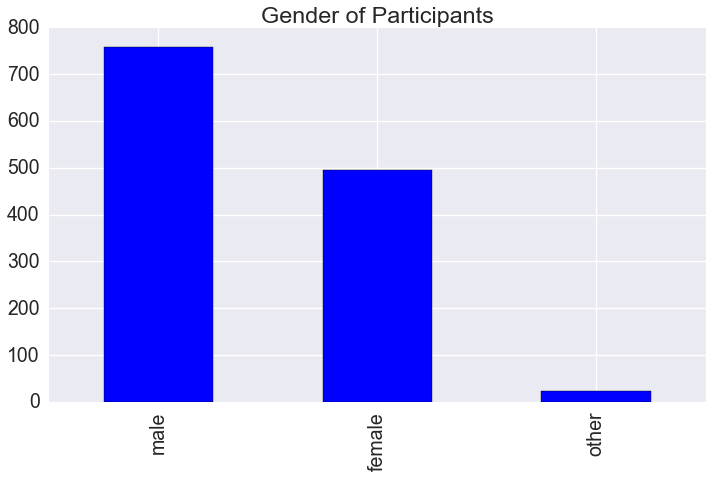

In [7]:
#with plt.style.context(('seaborn-talk')):
results.gender.value_counts().plot(kind='bar')
#plt.grid()
plt.title('Gender of Participants')
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
plt.tight_layout() 
plt.savefig('FIGS/gender_study2.png')

    #plt.title('Gender of Participants',fontsize=32)  
    #plt.xticks(fontsize=24)
    #plt.yticks(fontsize=24)
    #plt.tight_layout() 
    #plt.savefig('FIGS/gender_study2.png')

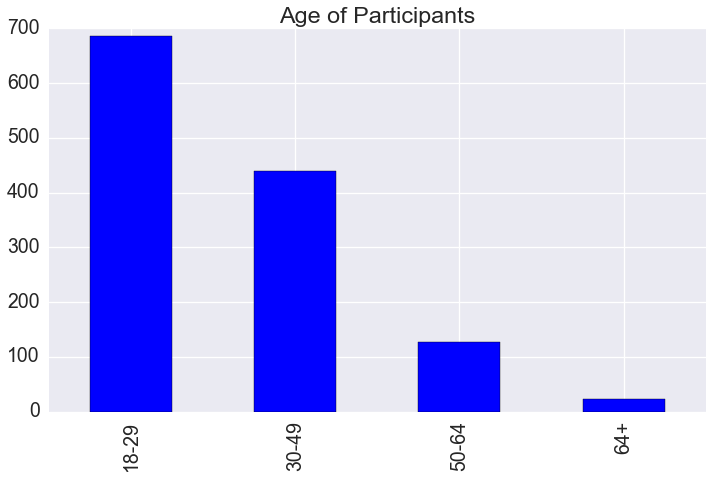

In [8]:
#with plt.style.context(('seaborn-talk')):
results.age.value_counts().plot(kind='bar')
plt.title('Age of Participants')  
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)

plt.tight_layout() 
plt.savefig('FIGS/age_study2.png')

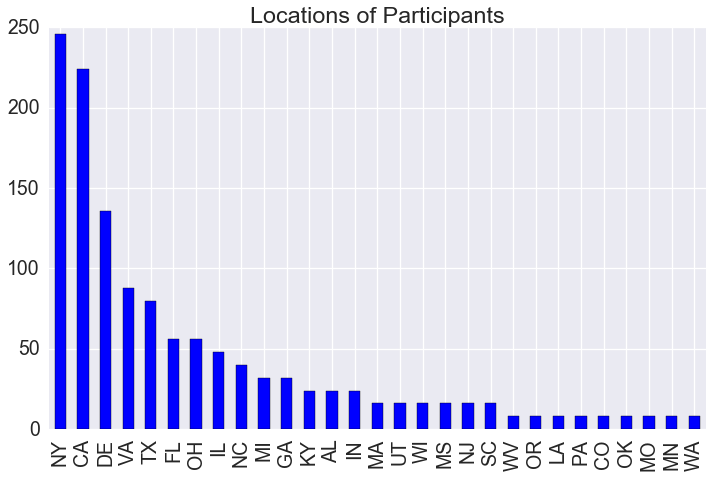

In [9]:
#with plt.style.context(('seaborn-talk')):
results.state.value_counts().plot(kind='bar')
plt.title('Locations of Participants')
#plt.grid(linestyle=":", color='black', alpha=0.5)
plt.tight_layout()
plt.savefig('FIGS/location_study2.png')
plt.show() 

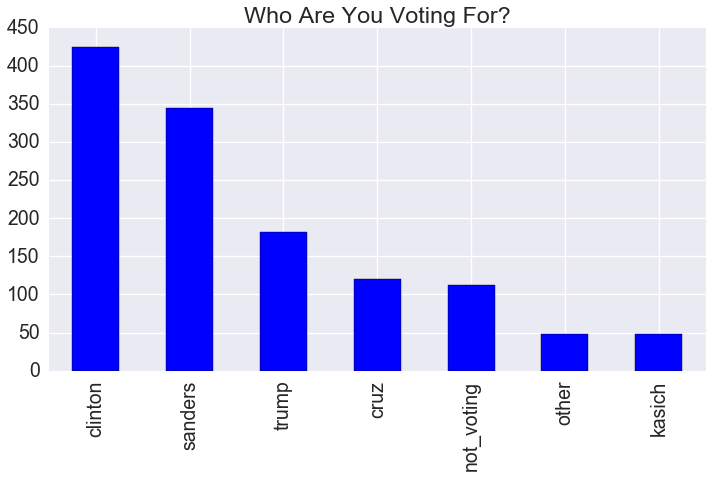

In [35]:
#with plt.style.context(('seaborn-poster')):
results.voting_for.sort_index().value_counts().plot(kind='bar') 
plt.title('Who Are You Voting For?') 
#plt.gcf().subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig('FIGS/voting_for_study2.png')

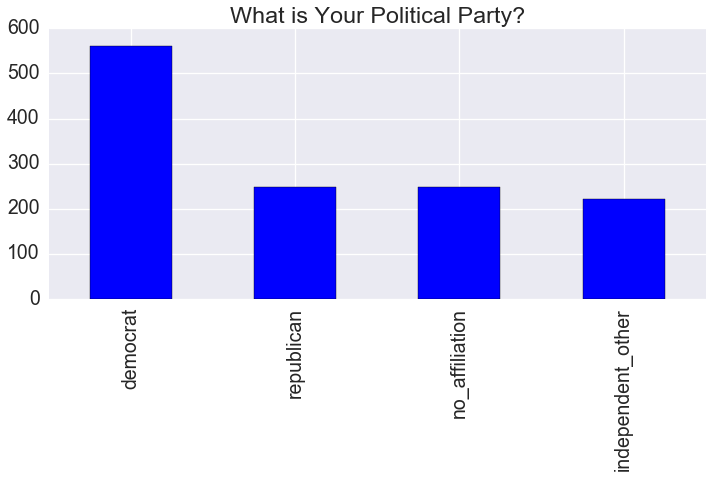

In [36]:
#with plt.style.context(('seaborn-poster')):
results.party.value_counts().plot(kind='bar') 
plt.title('What is Your Political Party?')
#plt.grid()
plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('FIGS/party_study2.png')

## Trust

In [12]:
results.trust.mean()

0.55633802816901412

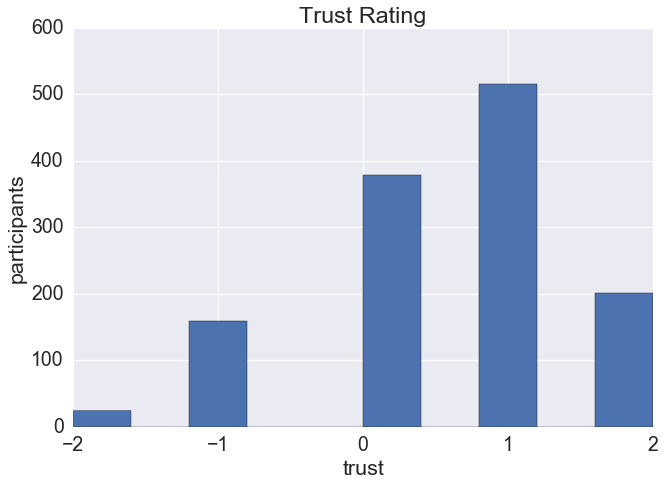

In [13]:
#with plt.style.context(('ggplot')):
results.trust.hist()
plt.xticks([-2, -1, 0, 1, 2])
plt.xlabel('trust')
plt.ylabel('participants')
plt.title('Trust Rating')
#plt.tight_layout()
 
plt.savefig('FIGS/trust.png')

## Trust By Candidate

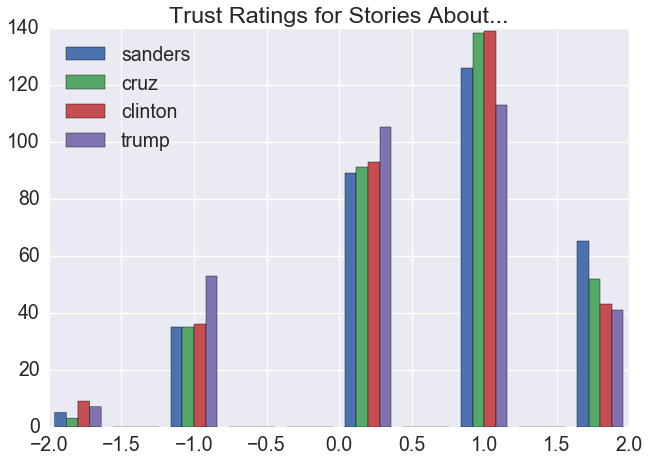

In [14]:
CANDIDATES = set(results.candidate)

#bins = numpy.linspace(-10, 10, 100)
ls = []
for c in CANDIDATES:
    ls.append(results[results.candidate==c].trust)
    #print results[results.candidate==c].trust.mean()
    #sns.distplot(results[results.candidate==c].trust)
    
    #plt.hist(results[results.candidate==c].trust, bins, alpha=0.5, label=c)
    #plt.xlim([-3,3])
    #plt.hist(results[results.candidate==c].trust, bins, alpha=0.5, label='y')
    #plt.legend(loc='upper right')
    #pyplot.show() 
    #results[results.candidate==c].trust.hist()
    #plt.xticks([-2, -1, 0, 1, 2])
    #plt.xlabel('trust')
    #plt.ylabel('participants')
    #plt.ylim([0,140])
    #plt.title('Trust Rating for ' + c.title())
    #plt.tight_layout()
    #plt.savefig('FIGS/trust_' + c + '.png')
    #plt.show()
    
plt.hist(ls, label=CANDIDATES)
#plt.xlim([-3,3])
#plt.hist(ls)
plt.legend(loc=0)
plt.title('Trust Ratings for Stories About...')
plt.savefig('FIGS/trust_all_candidates.png')
plt.show()

## Trust By Demographics

0.540897097625


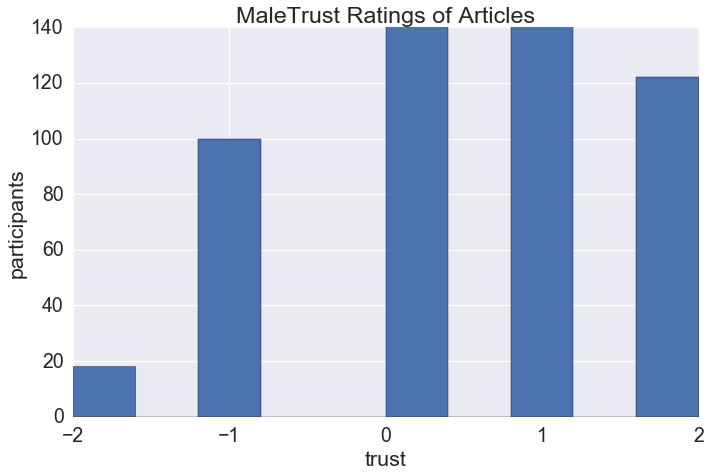

0.0833333333333


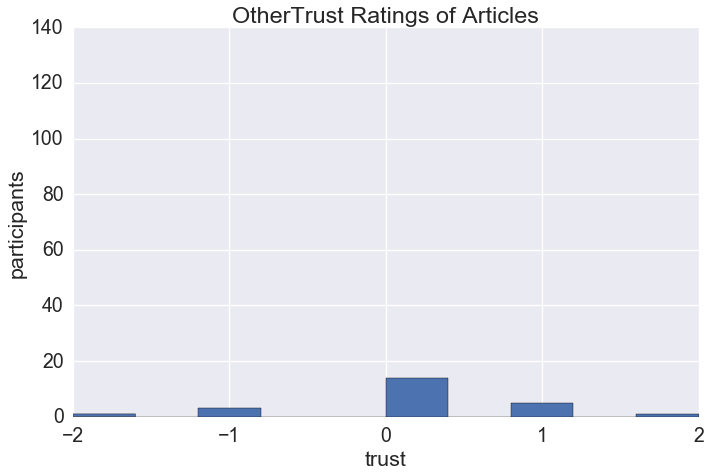

0.602822580645


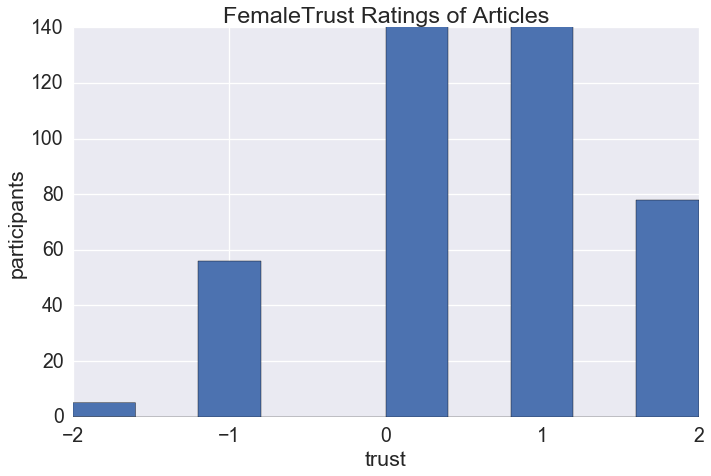

In [15]:
GENDER = set(results.gender)
for g in GENDER:
    print results[results.gender==g].trust.mean()
    results[results.gender==g].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('trust')
    plt.ylabel('participants')
    plt.ylim([0,140])
    plt.title(g.title() + 'Trust Ratings of Articles')
    plt.tight_layout()
    #plt.savefig('FIGS/trust_' + c + '.png')
    plt.show()

0.0833333333333


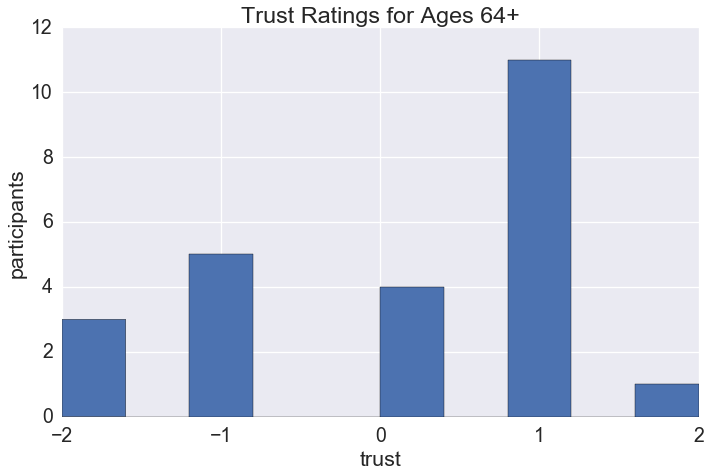

0.5703125


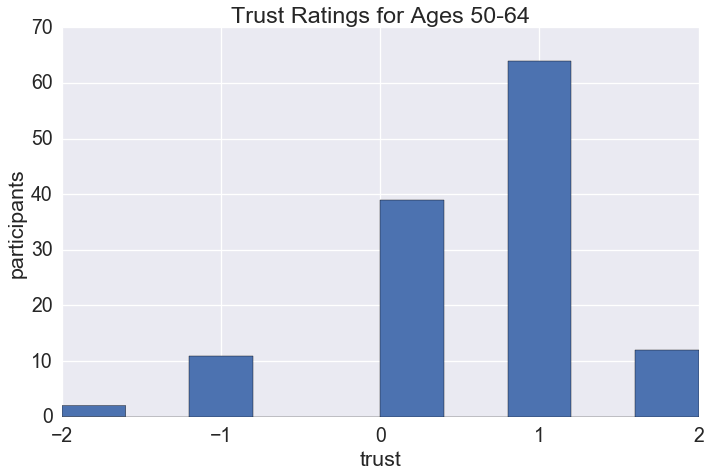

0.49416909621


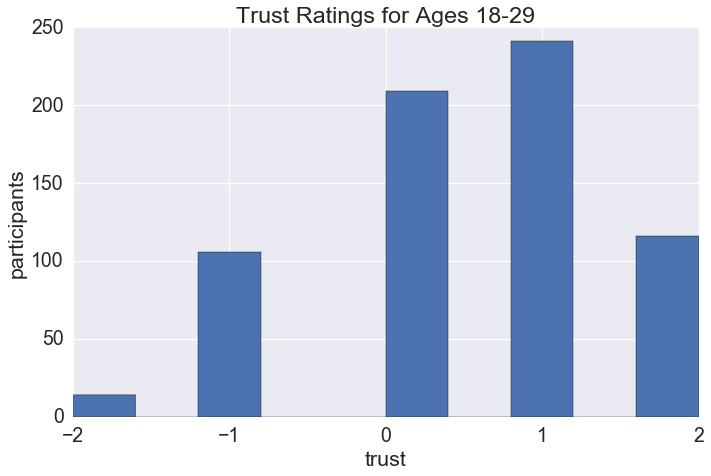

0.675


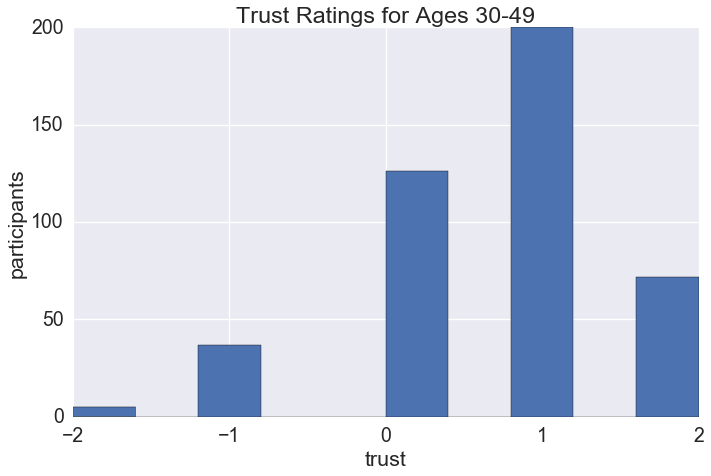

In [16]:
AGE = set(results.age)
for g in AGE:
    print results[results.age==g].trust.mean()
    results[results.age==g].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('trust')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Trust Ratings for Ages ' + g.title())
    plt.tight_layout()
    plt.savefig('FIGS/trust_' + g + '.png')
    plt.show()

## Trust by Party

0.486486486486


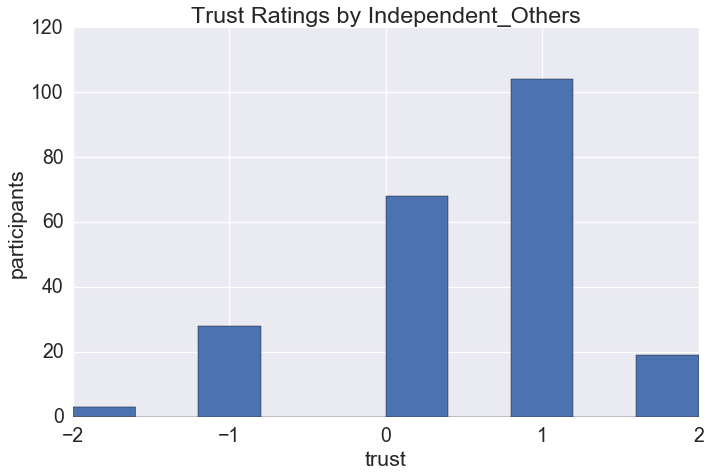

0.520161290323


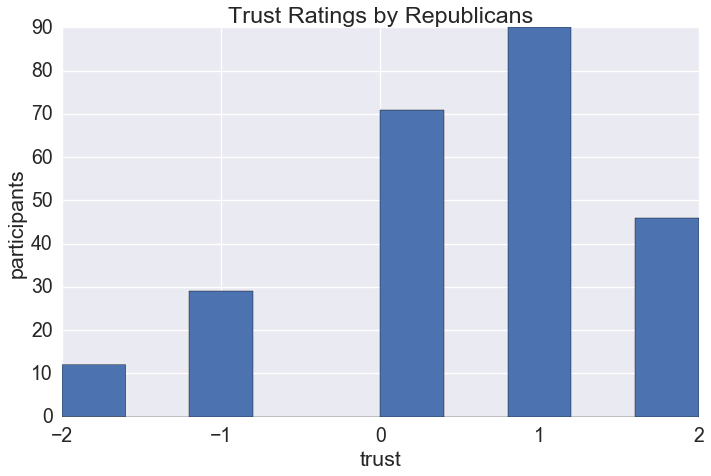

0.358870967742


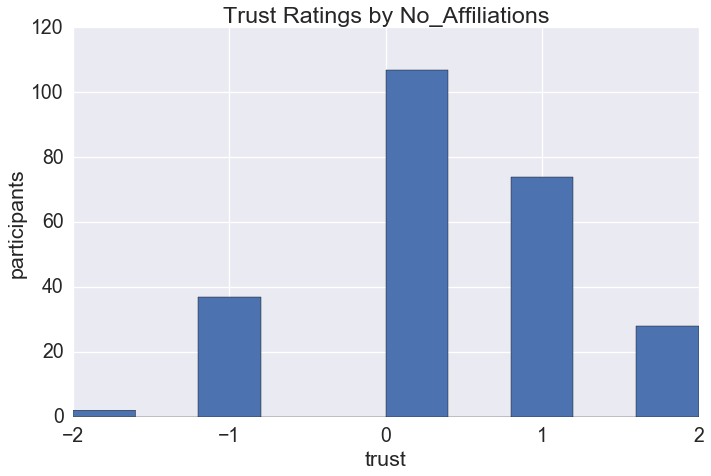

0.6875


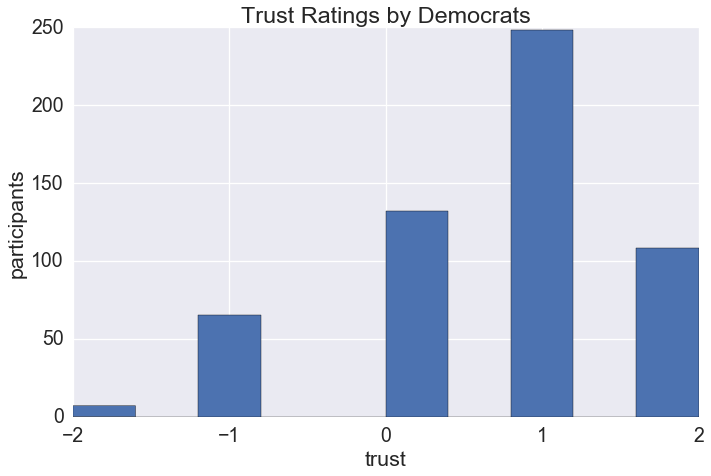

In [17]:
PARTY = set(results.party)
for g in PARTY:
    print results[results.party==g].trust.mean()
    results[results.party==g].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('trust')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Trust Ratings by ' + g.title() + 's')
    plt.tight_layout()
    plt.savefig('FIGS/trust_' + g + '.png')
    plt.show()

## Trust by Match

In [18]:
voting_for_to_code = {'Bernie Sanders': 'sanders',
                      'Donald Trump':'trump',
                      'Hillary Clinton':'clinton',
                     'John Kasich':'kasich',
                     'Not Voting':'nv',
                     'Other':'other',
                     'Ted Cruz':'cruz'}

results['voting_for_coded'] = results.voting_for.apply(lambda row: voting_for_to_code[row])
results.voting_for_coded

KeyError: 'clinton'

In [ ]:
VOTING_FOR = set(results.voting_for_coded)
for v in VOTING_FOR:
    print results[(results.candidate==v) & (results.voting_for_coded==v)].trust.mean()
    results[(results.candidate==v) & (results.voting_for_coded==v)].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('trust')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Trust for ' + v.title() + ' Voters for ' + v.title())
    plt.tight_layout()
    #plt.savefig('FIGS/trust_' + v + '.png')
    plt.show()

## Fairness

In [ ]:
results.fair.mean()

In [ ]:
results.trust.hist()
plt.xticks([-2, -1, 0, 1, 2])
plt.xlabel('fairness')
plt.ylabel('participants')
plt.title('Fairness Rating')
#plt.tight_layout()
plt.savefig('FIGS/fair.png')

## Fairness By Candidate

In [ ]:
CANDIDATES = set(results.candidate)
for c in CANDIDATES:
    print results[results.candidate==c].fair.mean()
    results[results.candidate==c].fair.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('fairness')
    plt.ylabel('participants')
    plt.ylim([0,140])
    plt.title('Fairness Rating for ' + c.title())
    plt.tight_layout()
    plt.savefig('FIGS/fair_' + c + '.png')
    plt.show()

## Trust By Demographics

0.514511873351


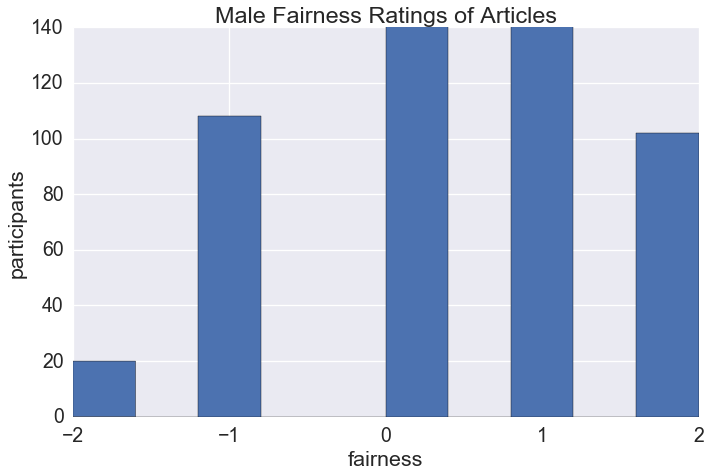

0.25


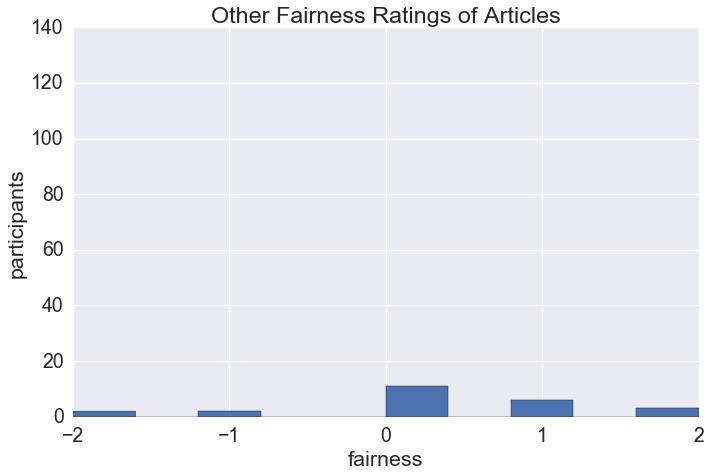

0.66935483871


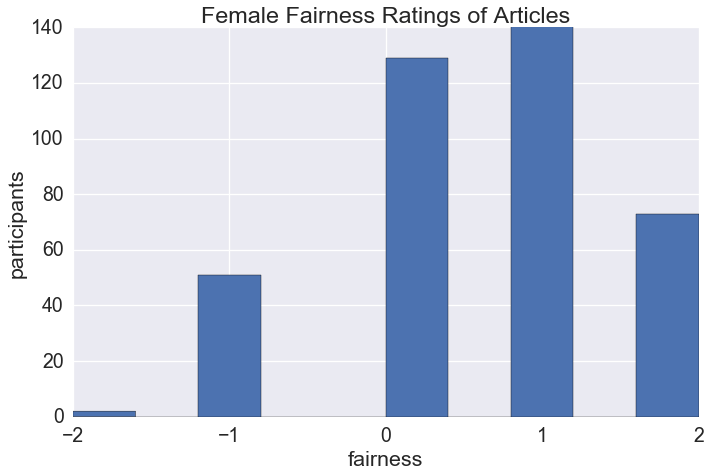

In [21]:
GENDER = set(results.gender)
for g in GENDER:
    print results[results.gender==g].fair.mean()
    results[results.gender==g].fair.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('fairness')
    plt.ylabel('participants')
    plt.ylim([0,140])
    plt.title(g.title() + ' Fairness Ratings of Articles')
    plt.tight_layout()
    #plt.savefig('FIGS/trust_' + c + '.png')
    plt.show()

0.208333333333


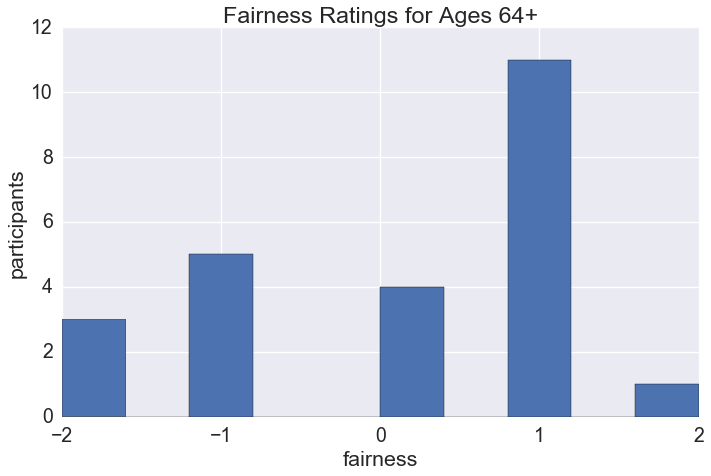

0.484375


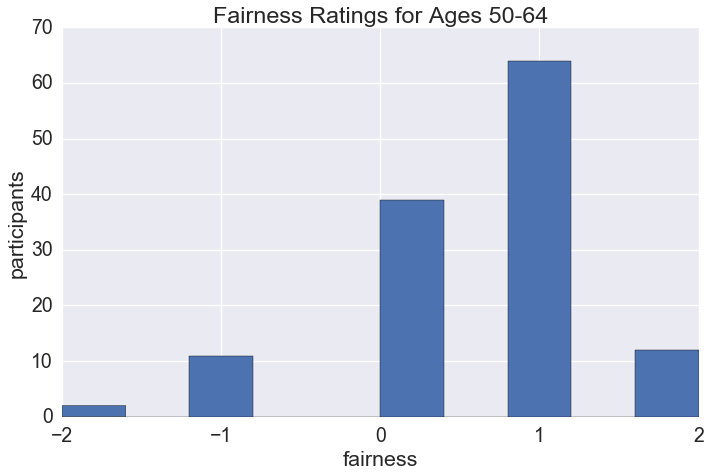

0.51166180758


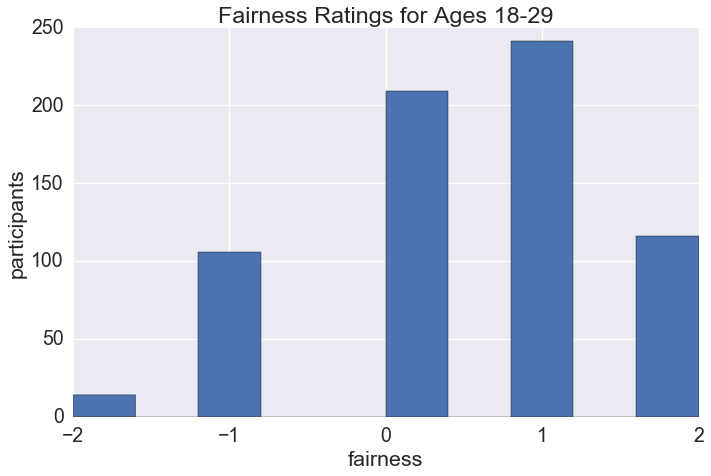

0.704545454545


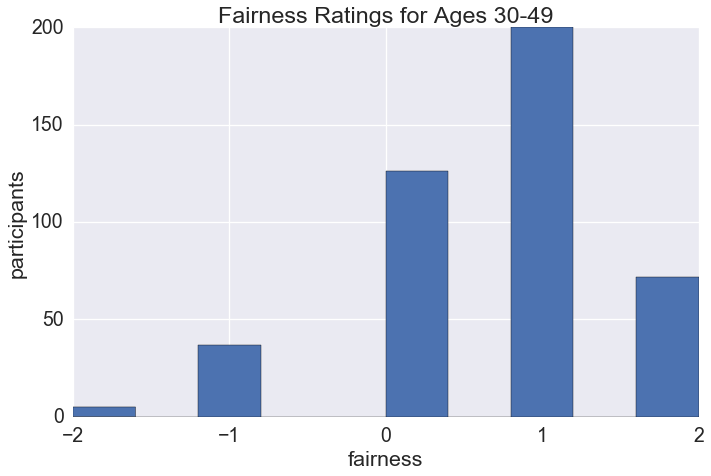

In [20]:
AGE = set(results.age)
for g in AGE:
    print results[results.age==g].fair.mean()
    results[results.age==g].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('fairness')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Fairness Ratings for Ages ' + g.title())
    plt.tight_layout()
    plt.savefig('FIGS/fair_' + g + '.png')
    plt.show()

## Trust by Party

0.657657657658


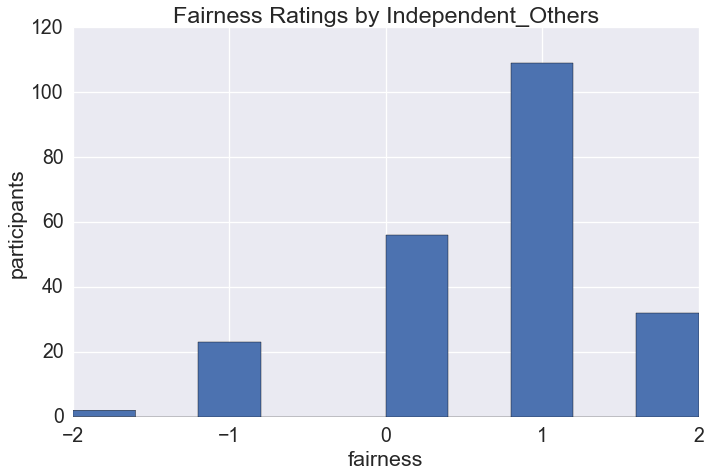

0.375


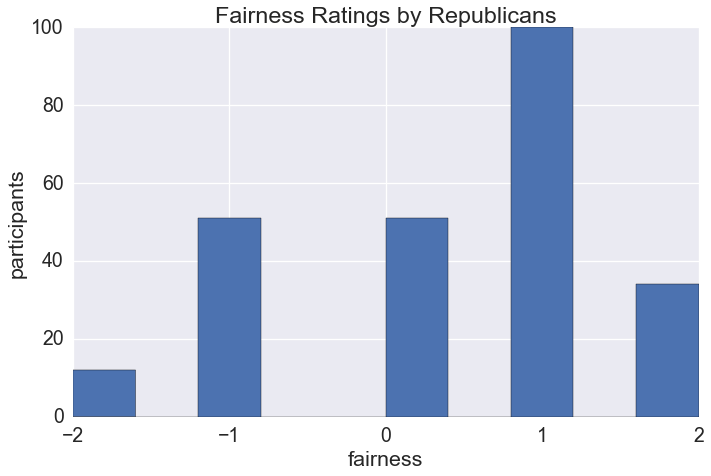

0.443548387097


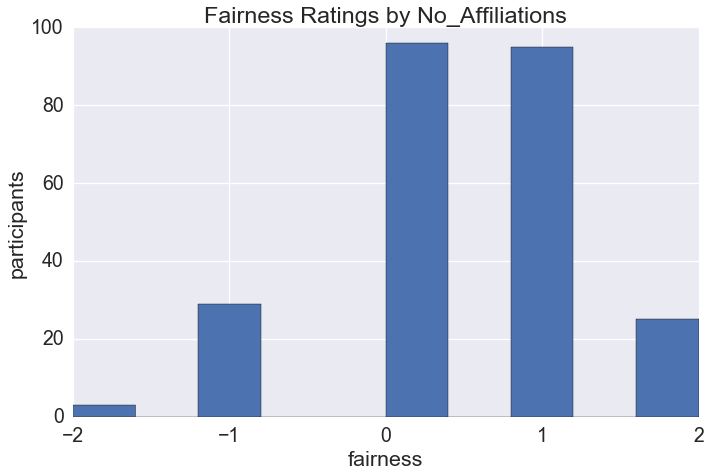

0.676785714286


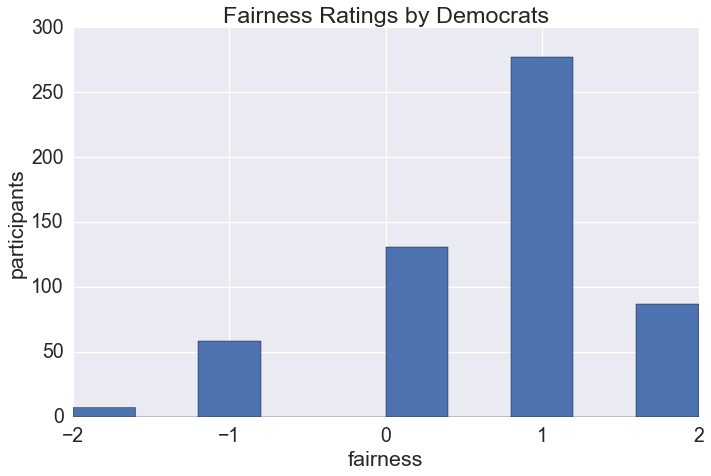

In [22]:
PARTY = set(results.party)
for g in PARTY:
    print results[results.party==g].fair.mean()
    results[results.party==g].fair.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('fairness')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Fairness Ratings by ' + g.title() + 's')
    plt.tight_layout()
    plt.savefig('FIGS/fair_' + g + '.png')
    plt.show()

## Trust by Match

In [23]:
voting_for_to_code = {'Bernie Sanders': 'sanders',
                      'Donald Trump':'trump',
                      'Hillary Clinton':'clinton',
                     'John Kasich':'kasich',
                     'Not Voting':'nv',
                     'Other':'other',
                     'Ted Cruz':'cruz'}

results['voting_for_coded'] = results.voting_for.apply(lambda row: voting_for_to_code[row])
results.voting_for_coded

KeyError: 'clinton'

In [ ]:
VOTING_FOR = set(results.voting_for_coded)
for v in VOTING_FOR:
    print results[(results.candidate==v) & (results.voting_for_coded==v)].trust.mean()
    results[(results.candidate==v) & (results.voting_for_coded==v)].trust.hist()
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlabel('trust')
    plt.ylabel('participants')
    #plt.ylim([0,140])
    plt.title('Trust for ' + v.title() + ' Voters for ' + v.title())
    plt.tight_layout()
    #plt.savefig('FIGS/trust_' + v + '.png')
    plt.show()

In [24]:
raw = pandas.DataFrame.from_csv('DATA/all_results/flattened_no_title.csv')

In [25]:
raw = raw.dropna()
len(raw)

1278

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1148fa090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1161b8590>]], dtype=object)

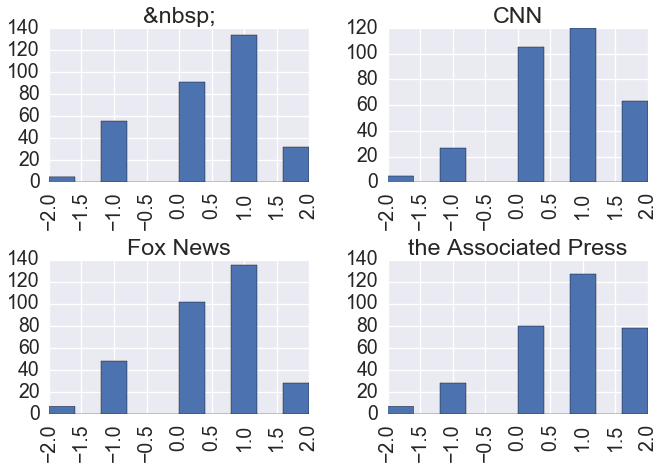

In [26]:
raw['trust'].hist(by=raw['source'], )
 

In [27]:
[raw[raw.source=='the Associated Press'].trust.mean(),
raw[raw.source=='Fox News'].trust.mean(),
raw[raw.source=='CNN'].trust.mean(),
raw[raw.source=='None'].trust.mean()]


[0.75312500000000004, 0.40312500000000001, 0.65312499999999996, nan]